# **Analisis Strategis Umpan Balik E-Commerce Menggunakan IBM Granite untuk Meningkatkan Strategi Produk dan Retensi Pelanggan**

# **IDENTITAS PEMBUAT**


Nama = Farhan Kamil Hermansyah;
Email = farmiljobs@gmail.com; nomor = 089609656714 ; github = https://github.com/Farmil23?tab=repositories

# **Bagian 1: Ringkasan Eksekutif & Konteks Strategis**

## **1.1 Imperatif Bisnis: Tingginya Biaya Akibat Kesalahan dalam Memahami Suara Pelanggan**

Perusahaan ritel kesulitan menganalisis ribuan ulasan pelanggan secara efektif karena metode manual yang digunakan lambat, bias, dan tidak menangkap konteks mendalam. Hal ini berdampak negatif pada:

Pengembangan Produk: Keputusan didasarkan intuisi, bukan data spesifik tentang atribut produk yang disukai pelanggan.
Manajemen Inventaris: Tidak dapat proaktif mengidentifikasi produk bermasalah, menyebabkan penumpukan stok barang tidak laku.
Pemasaran: Pesan pemasaran bersifat umum, kehilangan peluang untuk menyoroti fitur yang disukai pelanggan.
Retensi Pelanggan: Gagal mengatasi masalah pelanggan, mengurangi loyalitas dan menyebabkan pelanggan beralih ke kompetitor.
Intinya, perusahaan perlu beralih dari analisis manual ke metode yang lebih canggih untuk memahami suara pelanggan secara mendalam guna meningkatkan strategi produk, inventaris, pemasaran, dan retensi.

## **1.2 Tujuan Proyek dan Solusi yang Diusulkan:**


Dari Teks Mentah Menuju Intelijen Strategis Menjawab tantangan tersebut, proyek ini dirancang dengan tujuan yang jelas dan solusi berbasis teknologi AI terdepan.

Tujuan Utama: Merancang, membangun, dan memvalidasi sebuah kerangka kerja analitis berbasis AI menggunakan IBM Granite LLM untuk mentransformasi data ulasan pelanggan yang tidak terstruktur menjadi aliran intelijen bisnis yang berkelanjutan dan dapat ditindaklanjuti.

Solusi yang Diusulkan: Pipeline Intelijen Teks Multi-Tahap. Solusi yang diajukan melampaui analisis sentimen sederhana. Proyek ini akan mengimplementasikan sebuah pipeline analitis yang memanfaatkan kemampuan canggih IBM Granite untuk melakukan serangkaian tugas pemrosesan bahasa alami (NLP) yang kompleks:

Klasifikasi Tematik Granular: Untuk memahami secara mendalam topik apa yang dibicarakan pelanggan dalam ulasan mereka, seperti ukuran, kualitas kain, atau gaya.

Analisis Sentimen Bernuansa: Untuk mengidentifikasi bagaimana perasaan pelanggan terhadap setiap topik yang dibicarakan, melampaui sekadar label positif atau negatif.

Peringkasan Bertarget (Targeted Summarization): Untuk menyajikan intelijen yang ringkas dan mudah dicerna bagi para pemangku kepentingan di berbagai departemen.

Dampak Bisnis yang Diharapkan: Proyek ini akan mendemonstrasikan jalur yang jelas untuk mencapai peningkatan signifikan pada berbagai metrik bisnis utama. Dengan memanfaatkan wawasan yang dihasilkan, perusahaan dapat meningkatkan kesesuaian produk dengan pasar (product-market fit), mengurangi tingkat pengembalian produk, meningkatkan efektivitas kampanye pemasaran, dan pada akhirnya memperkuat retensi pelanggan. Semua ini secara langsung berkontribusi pada peningkatan profitabilitas dan keunggulan kompetitif perusahaan dalam jangka panjang.

# **Bagian 2: Kerangka Kerja**

### Import Library

In [ ]:
!pip install langchain_community
!pip install replicate

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


### Load Dataset

Link Dataset = https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews

In [ ]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


### Menghapus kolom yang tidak diperlukan


In [ ]:
# Membuat "Text" kolom dengan menyatukan "Title" dan "Review Text"
df["Text"] = df["Title"].fillna('') + " " + df["Review Text"]

# menghapus space yang tidak diperlukan
df["Text"] = df["Text"].str.strip()

# Menghapus kolom tidak diperlukan
df.drop(columns=['Unnamed: 0', 'Clothing ID', "Title", "Review Text","Positive Feedback Count"], axis=1, inplace=True)
df.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text
0,33,4,1,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,34,5,1,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


### Mengecek nilai yang hilang dan duplikat pada dataset

In [ ]:
# mengecek nilai yang hilang
print('Data yang valuenya hilang atau null: ')
df.isnull().sum().sort_values(ascending=False)

Data yang valuenya hilang atau null: 


,0
Text,845
Division Name,14
Department Name,14
Class Name,14
Recommended IND,0
Age,0
Rating,0


In [ ]:
# mengecek untuk duplikat
print(" Data yang duplikat:", df.duplicated().sum())

 Data yang duplikat: 235


In [ ]:
# Menghapus nilai kosong dan duplikat
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
# mengecek ulang data
print('Data yang valuenya hilang atau null: ')
df.isnull().sum().sort_values(ascending=False)

Data yang valuenya hilang atau null: 


,0
Age,0
Rating,0
Recommended IND,0
Division Name,0
Department Name,0
Class Name,0
Text,0


In [ ]:
print(" Data yang duplikat:", df.duplicated().sum())

 Data yang duplikat: 0


### info dari dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22624 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              22624 non-null  int64 
 1   Rating           22624 non-null  int64 
 2   Recommended IND  22624 non-null  int64 
 3   Division Name    22624 non-null  object
 4   Department Name  22624 non-null  object
 5   Class Name       22624 non-null  object
 6   Text             22624 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


In [ ]:
df.shape

(22624, 7)

Dataset ini berisi 22.624 ulasan pelanggan, termasuk usia, rating, status rekomendasi, nama divisi, nama departemen, nama kelas, dan teks ulasan.

* 🔹 Age, Rating, Recommended IND – Data numerik tanpa nilai yang hilang.
* 🔹 Division, Department, Class Name – Informasi terkait kategori produk.
* 🔹 Text – Gabungan ulasan pelanggan (Judul + Teks Ulasan).

### kolom Umur

Minimum age: 18
Maximum age: 99
Average age: 43.283946251768036
Median age: 41.0


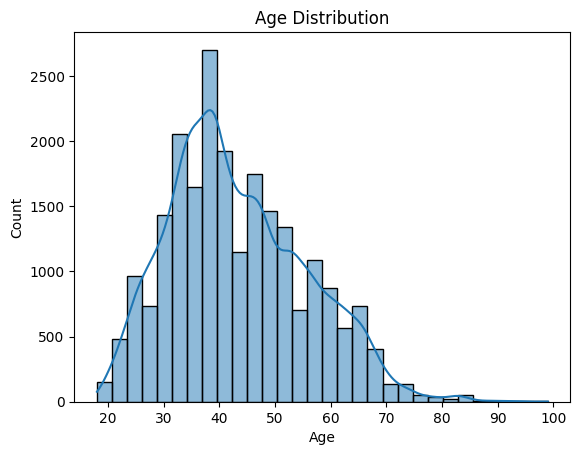

In [ ]:
# print minimum, maximum, average, median age
print("Minimum age:", df["Age"].min())
print("Maximum age:", df["Age"].max())
print("Average age:", df["Age"].mean())
print("Median age:", df["Age"].median())
# Histogram with KDE
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


Analisis Distribusi Usia

Rentang usia pemberi ulasan adalah 18 hingga 99 tahun, dengan rata-rata usia 43 tahun dan median 41 tahun. Sebagian besar ulasan berasal dari kelompok usia 30–45 tahun, sementara keterlibatan menurun setelah usia 50 tahun, terutama di kalangan usia 80 tahun ke atas. Distribusi data ini condong ke kanan (right-skewed), yang menunjukkan lebih sedikit pemberi ulasan di usia tua.

Wawasan Utama:

* Puncak Keterlibatan: Pemberi ulasan yang paling aktif berusia 30–45 tahun.
* Tren Penurunan: Lebih sedikit ulasan yang berasal dari mereka yang berusia 50 tahun ke atas, dengan jumlah minimal dari kelompok usia 80 tahun ke atas.

* Peluang Pemasaran: Menjangkau pembeli dari kalangan yang lebih muda dan lebih tua dapat meningkatkan partisipasi.

### kolom rating

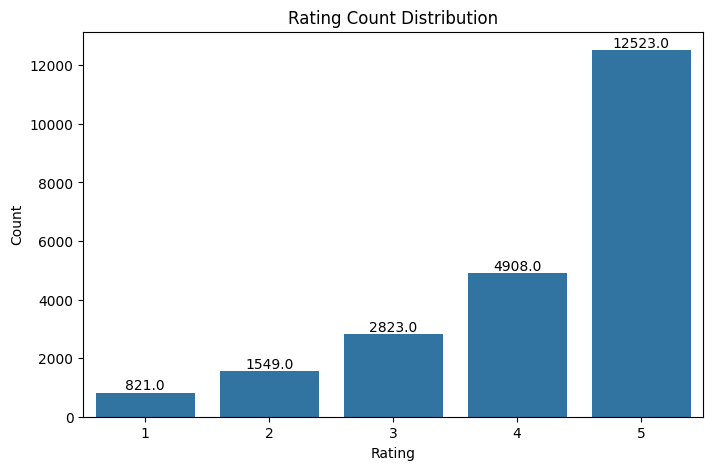

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Rating'])

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Rating Count Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## Analisis Distribusi Rating

Mayoritas ulasan memiliki rating tinggi, dengan **rating bintang 5 (12.523)** menjadi yang paling umum, diikuti oleh **rating bintang 4 (4.908)**. Rating yang lebih rendah jumlahnya jauh lebih sedikit, dengan rating **bintang 3 (2.823)**, **bintang 2 (1.549)**, dan **bintang 1 (821)** hanya merupakan sebagian kecil dari keseluruhan dataset.

### Wawasan Utama:
* **Bias Positif yang Kuat:** Kumpulan data ini sangat condong ke arah rating positif (bintang 4 & 5).
* **Rating Negatif yang Rendah:** Sangat sedikit pelanggan yang memberikan bintang 1 atau 2, yang mengindikasikan kepuasan secara umum.
* **Potensi Bias Ulasan:** Ketidakseimbangan ini mungkin menunjukkan bahwa pelanggan cenderung meninggalkan ulasan untuk pengalaman yang sangat memuaskan, bukan untuk pengalaman yang netral atau negatif.

## kolom department name

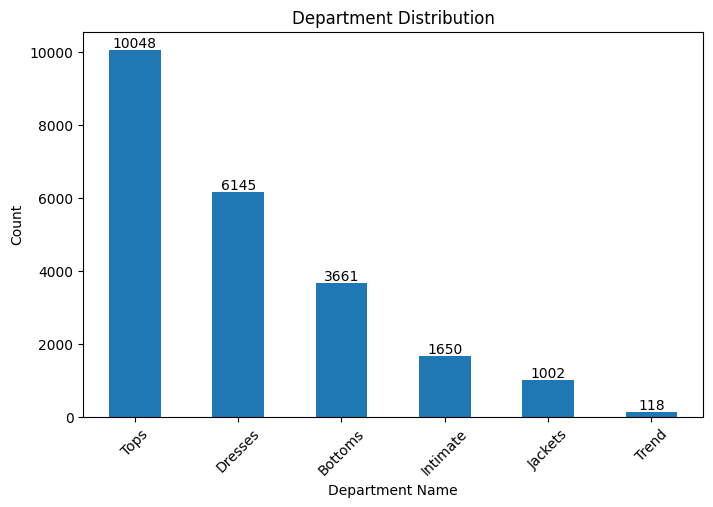

In [ ]:
plt.figure(figsize=(8, 5))
ax = df['Department Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Department Distribution")
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

## Analisis Distribusi Departemen

Departemen **Tops** (Atasan) memiliki jumlah ulasan tertinggi (10.048), diikuti oleh **Dresses** (Gaun) (6.145) dan **Bottoms** (Bawahan) (3.661). Departemen lain seperti **Intimate** (Pakaian Dalam) (1.650), **Jackets** (Jaket) (1.002), dan **Trend** (118) memiliki jumlah ulasan yang jauh lebih sedikit.

### Wawasan Utama:
* **Keterlibatan Tinggi:** *Tops* dan *Dresses* adalah kategori yang paling banyak diulas, yang menunjukkan minat pelanggan yang kuat.
* **Interaksi Rendah:** *Trend* dan *Jackets* memiliki ulasan paling sedikit, yang menunjukkan popularitas atau ketersediaan yang lebih rendah.
* **Area Fokus Potensial:** Meningkatkan upaya pemasaran untuk departemen yang kurang diulas dapat mendorong keterlibatan pelanggan.

## kolom class name

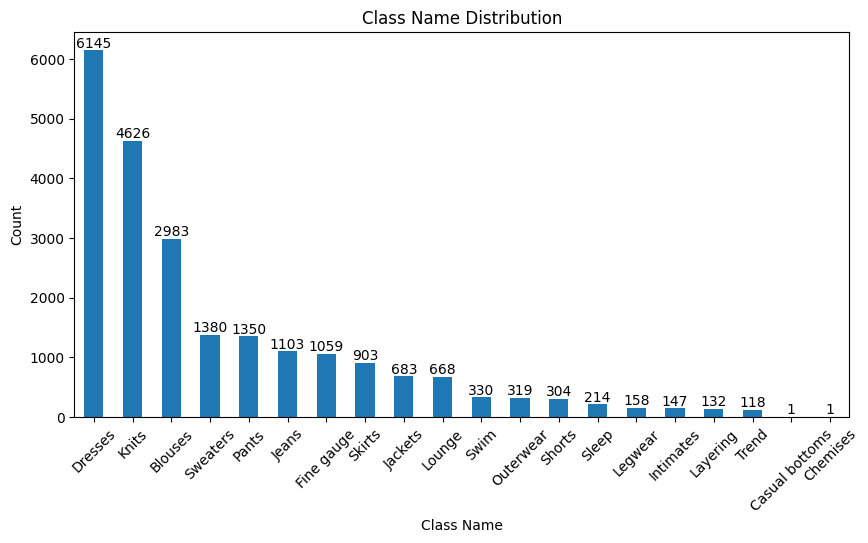

In [ ]:
plt.figure(figsize=(10, 5))  # Adjust figure size
ax = df['Class Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Class Name Distribution")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

## Analisis Distribusi Nama Kelas (Kategori Produk)

Kategori **Dresses** (Gaun) memiliki jumlah ulasan tertinggi (6.145), diikuti oleh **Knits** (Rajutan) (4.626) dan **Blouses** (Blus) (2.983). Kategori lain seperti **Chemises** (Kemeja Wanita Tipis) (1) dan **Casual Bottoms** (Bawahan Kasual) (1) memiliki keterlibatan yang sangat rendah.

### Wawasan Utama:
* **Item Terlaris:** *Dresses*, *Knits*, dan *Blouses* mendominasi jumlah ulasan, yang menunjukkan bahwa produk-produk ini adalah yang paling populer.
* **Kategori Kurang Diminati:** Item seperti *Chemises*, *Casual Bottoms*, dan *Trend* memiliki ulasan yang sangat minim, menandakan penjualan atau ketersediaan yang rendah.
* **Fokus Pemasaran:** Upaya dapat difokuskan untuk mempromosikan kategori yang berkinerja kurang baik guna meningkatkan visibilitas dan penjualan.

## division name

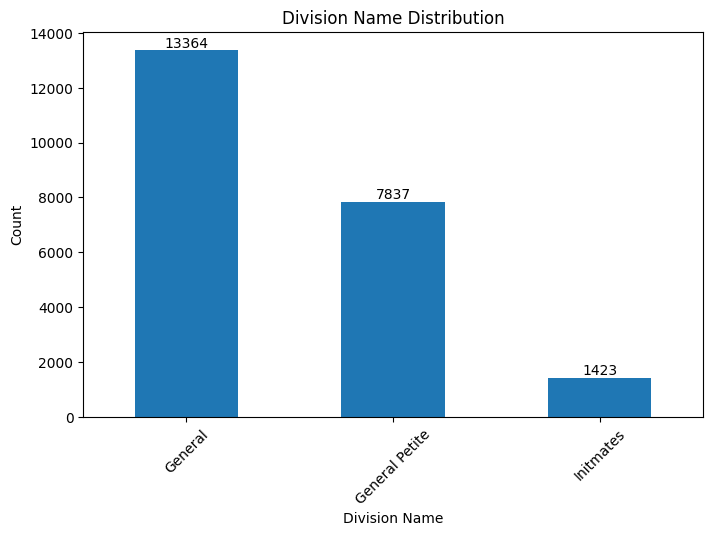

In [ ]:
plt.figure(figsize=(8, 5))  # Set figure size
ax = df['Division Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Division Name Distribution")
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

## Analisis Distribusi Nama Divisi

Divisi **General** (Umum) memiliki jumlah ulasan tertinggi (13.364), diikuti oleh **General Petite** (Umum Ukuran Kecil) (7.837). Divisi **Intimates** (Pakaian Dalam) memiliki jumlah ulasan paling sedikit (1.423), yang menunjukkan keterlibatan yang lebih rendah.

### Wawasan Utama:
* **Dominasi Divisi General:** Sebagian besar ulasan berasal dari divisi *General*, yang menandakan basis pelanggan yang lebih luas.
* **Kehadiran Pasar Petite:** Divisi *General Petite* memiliki keterlibatan yang signifikan, menunjukkan adanya permintaan untuk pakaian berukuran kecil (*petite*).
* **Rendahnya Ulasan Divisi Intimates:** Kategori *Intimates* memiliki lebih sedikit ulasan, yang mungkin disebabkan oleh penjualan yang lebih rendah atau keengganan pelanggan untuk mengulas produk semacam itu.

## kolom recomendation IND

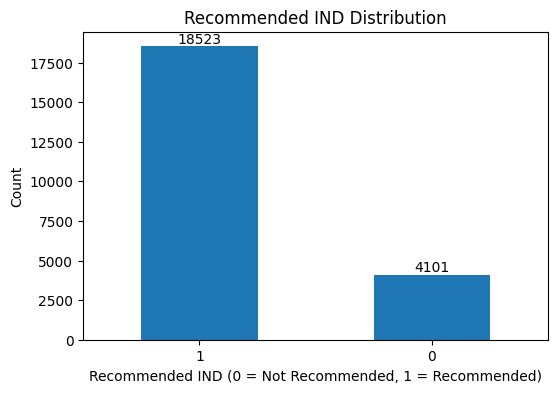

In [ ]:
plt.figure(figsize=(6, 4))  # Adjust figure size
ax = df['Recommended IND'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Recommended IND Distribution")
plt.xlabel("Recommended IND (0 = Not Recommended, 1 = Recommended)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

## Analisis Distribusi Rekomendasi

Sebagian besar ulasan (**18.523**) merekomendasikan produk (`Recommended IND = 1`), sementara hanya **4.101** ulasan yang tidak merekomendasikannya (`Recommended IND = 0`).

### Wawasan Utama:
* **Tingkat Rekomendasi Tinggi:** Sekitar **82%** pelanggan merekomendasikan produk, yang menandakan kepuasan pelanggan secara keseluruhan.
* **Umpan Balik Negatif Minor:** Hanya **18%** pelanggan yang tidak merekomendasikan produk, yang menunjukkan adanya area untuk perbaikan potensial.
* **Jaminan Kualitas:** Memahami karakteristik produk yang tidak direkomendasikan (misalnya, rating rendah, kategori tertentu) dapat membantu meningkatkan kualitas dan penjualan.

## WorkCloud dari recommendation IND

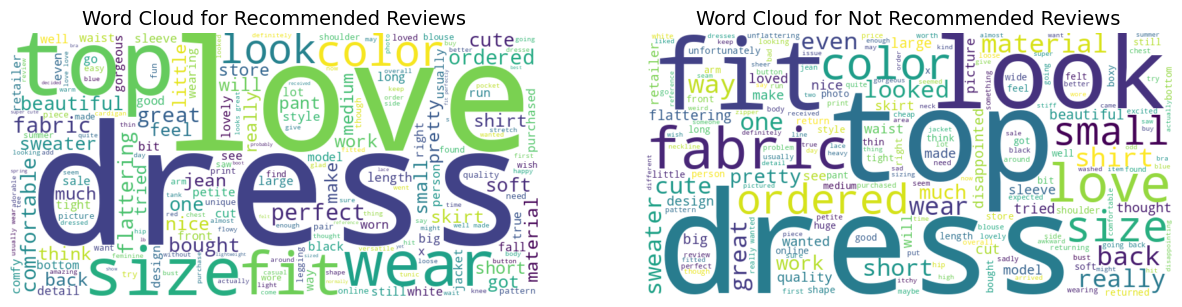

In [ ]:
# Separate text data based on Recommended IND
recommended_text = " ".join(df[df["Recommended IND"] == 1]["Text"].astype(str))
not_recommended_text = " ".join(df[df["Recommended IND"] == 0]["Text"].astype(str))

# Generate WordClouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

wordcloud_recommended = WordCloud(width=800, height=400, background_color="white").generate(recommended_text)
axes[0].imshow(wordcloud_recommended, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Word Cloud for Recommended Reviews", fontsize=14)

wordcloud_not_recommended = WordCloud(width=800, height=400, background_color="white").generate(not_recommended_text)
axes[1].imshow(wordcloud_not_recommended, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Word Cloud for Not Recommended Reviews", fontsize=14)

plt.show()

## Analisis Word Cloud: Kata Kunci dalam Ulasan

Gambar ini menampilkan dua *word cloud* yang membandingkan kata-kata yang paling sering muncul dalam ulasan yang direkomendasikan dan yang tidak direkomendasikan.

### 1. Word Cloud untuk Ulasan yang Direkomendasikan (Kiri)
* **Kata Kunci Dominan:** `love`, `dress`, `wear`, `top`, `great`, `perfect`, `fabric`, `fit`, `color`.
* **Analisis:** Ulasan positif sangat didominasi oleh kata-kata yang mengungkapkan sentimen emosional (`love`, `great`, `perfect`) dan kepuasan fungsional. Kata-kata seperti `fit` (pas), `comfortable` (nyaman), dan `flattering` (mempercantik) menunjukkan bahwa pelanggan puas dengan bagaimana pakaian itu terasa dan terlihat saat dikenakan. Fokusnya adalah pada kualitas pengalaman positif secara keseluruhan.

### 2. Word Cloud untuk Ulasan yang Tidak Direkomendasikan (Kanan)
* **Kata Kunci Dominan:** `dress`, `fabric`, `look`, `top`, `small`, `size`, `ordered`, `disappoint`.
* **Analisis:** Ulasan negatif berfokus pada masalah yang sangat spesifik. Kata **`size`** (ukuran) dan **`small`** (kekecilan) sangat menonjol, menunjukkan bahwa masalah ukuran adalah penyebab utama kekecewaan. Kata `fabric` (kain) dan `look` (terlihat/penampilan) juga besar, yang menyiratkan bahwa kualitas bahan dan ketidaksesuaian produk dengan gambar (`look like picture`) adalah keluhan umum lainnya. Kata `disappoint` (kecewa) secara eksplisit menunjukkan ketidakpuasan pelanggan.

### Wawasan Utama:
* **Penyebab Utama Ketidakpuasan:** Masalah **ukuran** (`size`, `small`) adalah alasan paling umum pelanggan tidak merekomendasikan produk.
* **Kualitas dan Ekspektasi:** Kualitas **kain** (`fabric`) dan **penampilan** (`look`) yang tidak sesuai harapan adalah pendorong utama ulasan negatif. Pelanggan kecewa ketika produk yang diterima tidak seperti yang mereka bayangkan.
* **Faktor Kepuasan:** Di sisi lain, kepuasan pelanggan sangat ditentukan oleh **kesesuaian ukuran** (`fit`), **kenyamanan** (`comfortable`), dan sentimen positif secara umum (`love`, `great`).

## rata rata rating dari kalangan

/tmp/ipython-input-20-2976451656.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_ratings = df.groupby('Age Group')['Rating'].mean().reset_index()
/tmp/ipython-input-20-2976451656.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Rating', data=age_group_ratings, palette='coolwarm')


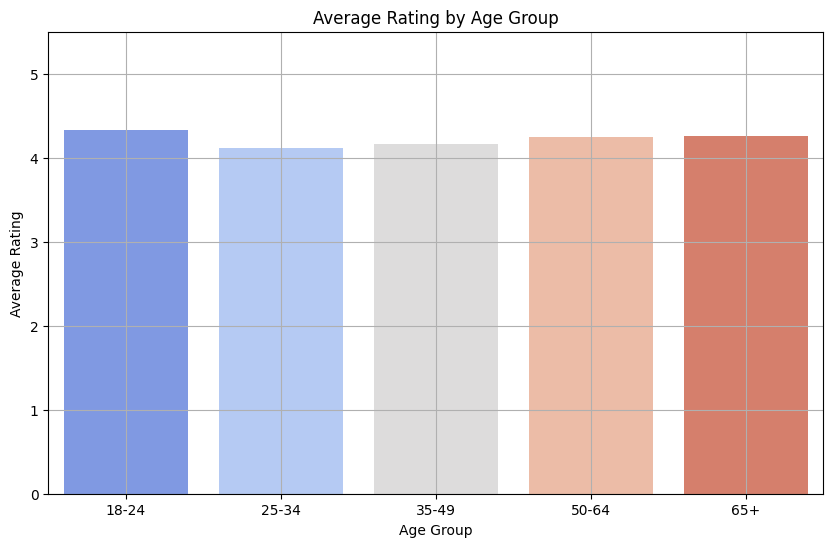

In [ ]:
# Define age groups
bins = [18, 25, 35, 50, 65, 100]  # Age Ranges
labels = ['18-24', '25-34', '35-49', '50-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate the average rating
age_group_ratings = df.groupby('Age Group')['Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Rating', data=age_group_ratings, palette='coolwarm')

# Customize plot
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.ylim(0, 5.5)
plt.grid(True)

# Show plot
plt.show()


## Analisis Rata-Rata Rating Berdasarkan Kelompok Usia

Grafik batang ini menampilkan perbandingan rata-rata rating yang diberikan oleh lima kelompok usia yang berbeda.

### Observasi Grafik:
* **Kepuasan Tinggi Merata:** Secara keseluruhan, semua kelompok usia memberikan rata-rata rating yang sangat positif, yaitu di atas **4.0 dari 5**. Ini menandakan tingkat kepuasan yang tinggi di semua segmen demografis.
* **Rating Tertinggi:** Kelompok usia **18-24 tahun** memberikan rata-rata rating paling tinggi, berada di sekitar 4.35.
* **Sedikit Penurunan di Usia Tengah:** Kelompok usia **25-34** dan **35-49 tahun** menunjukkan rating yang sedikit lebih rendah dibandingkan kelompok termuda, berada di kisaran 4.1 hingga 4.2.
* **Peningkatan di Usia Senior:** Kelompok usia yang lebih tua, yaitu **50-64** dan **65+**, kembali menunjukkan rata-rata rating yang sedikit lebih tinggi, sekitar 4.25.

### Wawasan Utama:
* **Pola "U-Shape":** Terdapat pola "U" atau "senyum" yang tipis pada distribusi rating. Rating tertinggi diberikan oleh kelompok usia termuda, sedikit menurun di usia paruh baya, dan kembali naik pada kelompok usia senior.
* **Konsistensi Positif:** Meskipun ada sedikit variasi, tidak ada kelompok usia yang menunjukkan ketidakpuasan signifikan. Hal ini menunjukkan bahwa produk atau layanan yang ditawarkan dapat diterima dengan baik oleh berbagai generasi.
* **Pelanggan Termuda Paling Puas:** Pelanggan termuda (18-24 tahun) cenderung menjadi kelompok yang paling antusias atau paling puas dengan pengalaman mereka.

## Recommended IND vs. Department Name

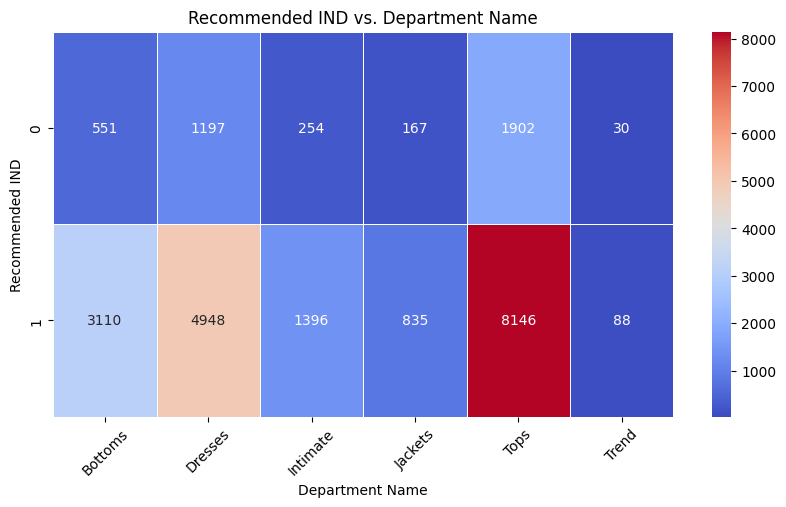

In [ ]:
# Create the contingency table
crosstab = pd.crosstab(df['Recommended IND'], df['Department Name'])

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap="coolwarm", linewidths=0.5)

# Labels and title
plt.title("Recommended IND vs. Department Name")
plt.xlabel("Department Name")
plt.ylabel("Recommended IND")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


Heatmap ini secara visual menggambarkan kinerja berbagai departemen dalam hal rekomendasi. Intensitas warna pada heatmap menunjukkan jumlah rekomendasi yang diterima oleh setiap departemen.

 Observasi Utama:

* **Rekomendasi Tertinggi:**
    * **Tops** (Atasan): 8.146 rekomendasi
    * **Dresses** (Gaun): 4.948 rekomendasi

* **Rekomendasi Terendah:**
    * **Trend**: 88 rekomendasi
    * **Jackets** (Jaket): 835 rekomendasi

Hal ini menunjukkan bahwa pelanggan sangat menyukai produk dari departemen **Tops** dan **Dresses**. Sebaliknya, departemen **Trend** dan **Jackets** mungkin memerlukan perbaikan dalam hal desain, kualitas, atau strategi pemasaran untuk meningkatkan jumlah rekomendasi.

### Mengetes dengan Chi square untuk keterhubungan antara Department Name & Recommended IND


In [ ]:
from scipy import stats
# Create a contingency table
crosstab = pd.crosstab(df["Department Name"], df["Recommended IND"])

# Perform Chi-Square Test
chi2_stat, p, dof, expected = stats.chi2_contingency(crosstab)

# Print results
print(f'Chi-square Statistic: {chi2_stat:.4f}')
print(f'Degrees of Freedom: {dof}')
print(f'P-value: {p:.4f}')

# Decision Rule
alpha = 0.05  # Significance level
if p < alpha:
    print("❌ Tolak hipotesis nol (H₀) → There is a significant association between Department Name and Recommendation.")
else:
    print("✅ gagal menolak hipotesis nol(H₀) → No significant association found between Department Name and Recommendation.")

Chi-square Statistic: 49.2530
Degrees of Freedom: 5
P-value: 0.0000
❌ Tolak hipotesis nol (H₀) → There is a significant association between Department Name and Recommendation.


**Analisis Hasil Uji Chi-Square**

Gambar ini menampilkan hasil dari uji statistik Chi-Square yang digunakan untuk menguji hubungan antara dua variabel kategori, yaitu **Nama Departemen** dan **Rekomendasi**.

**Ringkasan Hasil Statistik:**
* **Statistik Chi-square:** 49.2530
* **Derajat Kebebasan (Degrees of Freedom):** 5
* **P-value:** 0.0000

**Interpretasi Hasil:**

1.  **Hipotesis Nol (H₀):** Dalam konteks ini, Hipotesis Nol (H₀) adalah asumsi bahwa **tidak ada hubungan** (asosiasi) yang signifikan antara departemen produk dan kecenderungan pelanggan untuk memberikan rekomendasi.

2.  **P-value:** Nilai P-value yang didapat adalah **0.0000**. Nilai ini sangat kecil dan secara praktis dianggap nol. Dalam statistik, jika P-value lebih kecil dari tingkat signifikansi yang umum digunakan (misalnya, α = 0.05), kita menolak Hipotesis Nol.

3.  **Kesimpulan:**
    * Seperti yang tertera pada gambar: **Tolak Hipotesis Nol (H₀)**.
    * Ini berarti ada cukup bukti statistik untuk menyatakan bahwa **terdapat hubungan yang signifikan antara Nama Departemen dan Rekomendasi**.

**Makna Praktis:**
Secara sederhana, hasil ini mengonfirmasi bahwa departemen tempat suatu produk berada **memiliki pengaruh nyata** terhadap apakah pelanggan akan merekomendasikan produk tersebut atau tidak. Beberapa departemen secara signifikan lebih mungkin menerima rekomendasi dibandingkan yang lain.

## Recommended IND & Division

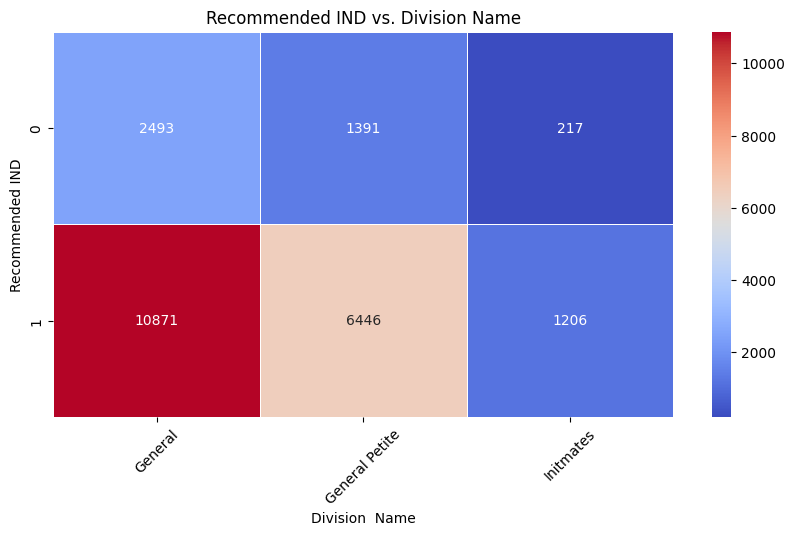

In [ ]:
# Create the contingency table
crosstab = pd.crosstab(df['Recommended IND'], df['Division Name'])

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap="coolwarm", linewidths=0.5)

# Labels and title
plt.title("Recommended IND vs. Division Name")
plt.xlabel("Division  Name")
plt.ylabel("Recommended IND")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

### Mengetes dengan Chi square untuk keterhubungan antara Department Name & Recommended IND


In [ ]:
# Create a contingency table
crosstab = pd.crosstab(df["Division Name"], df["Recommended IND"])

# Perform Chi-Square Test
chi2_stat, p, dof, expected = stats.chi2_contingency(crosstab)

# Print results
print(f'Chi-square Statistic: {chi2_stat:.4f}')
print(f'Degrees of Freedom: {dof}')
print(f'P-value: {p:.4f}')

# Decision rule
if p < alpha:
    print("❌ Tolak hipotesis nol (H₀) → There is a significant association between Department Name and Recommendation.")
else:
    print("✅ gagal menolak hipotesis nol(H₀) → No significant association found between Department Name and Recommendation.")

Chi-square Statistic: 11.1998
Degrees of Freedom: 2
P-value: 0.0037
❌ Tolak hipotesis nol (H₀) → There is a significant association between Department Name and Recommendation.


**Analisis Hasil Uji Chi-Square**

Gambar ini menampilkan hasil dari uji statistik Chi-Square yang digunakan untuk menguji hubungan antara **Nama Divisi** dan **Rekomendasi**.

**Ringkasan Hasil Statistik:**
* **Statistik Chi-square:** 11.1998
* **Derajat Kebebasan (Degrees of Freedom):** 2
* **P-value:** 0.0037

**Interpretasi Hasil:**

1.  **Hipotesis Nol (H₀):** Dalam uji ini, Hipotesis Nol (H₀) adalah asumsi bahwa **tidak ada hubungan** (asosiasi) yang signifikan antara divisi produk dan rekomendasi yang diberikan pelanggan.

2.  **P-value:** Nilai P-value yang didapat adalah **0.0037**. Nilai ini sangat kecil dan berada di bawah ambang batas umum (seperti α = 0.05 atau α = 0.01).

3.  **Kesimpulan:**
    * Seperti yang tertera pada gambar: **Tolak Hipotesis Nol (H₀)**.
    * Ini berarti ada cukup bukti statistik untuk menyatakan bahwa **terdapat hubungan yang signifikan antara Nama Divisi dan Rekomendasi**.

**Makna Praktis:**
Secara sederhana, hasil ini mengonfirmasi bahwa divisi tempat suatu produk berada **memiliki pengaruh nyata** terhadap apakah pelanggan akan merekomendasikan produk tersebut atau tidak. Beberapa divisi secara signifikan lebih mungkin menerima rekomendasi dibandingkan yang lain.

## Teks preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')

# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Define a slang dictionary
slang_dict = {
    "lol": "laughing out loud",
    "brb": "be right back",
    "imo": "in my opinion",
    "imho": "in my humble opinion",
    "fyi": "for your information",
    "btw": "by the way",
    "omg": "oh my god",
    "bff": "best friends forever",
    "lmao": "laughing my ass off",
    "rofl": "rolling on the floor laughing",
    "asap": "as soon as possible",
    "tmi": "too much information",
    "gtg": "got to go",
    "idk": "i dont know",
    "nvm": "never mind",
    "jk": "just kidding",
    "irl": "in real life",
    "yolo": "you only live once",
    "smh": "shaking my head",
    "ftw": "for the win",
    "wth": "what the hell",
    "wtf": "what the fuck",
    "wbu": "what about you",
    "wyd": "what you doing",
    "ikr": "i know right",
    "afaik": "as far as i know",
    "afk": "away from keyboard",
    "dank": "cool", # Example of sentiment-based slang
    "lit": "amazing", # Example of sentiment-based slang
    "basic": "unoriginal", # Example of sentiment-based slang
    "salty": "bitter or annoyed", # Example of sentiment-based slang
    "extra": "over the top", # Example of sentiment-based slang
    "boujee": "high class", # Example of sentiment-based slang
    "cringe": "embarrassing", # Example of sentiment-based slang
    "fire": "excellent", # Example of sentiment-based slang
    "flex": "show off", # Example of sentiment-based slang
    "g.o.a.t": "greatest of all time",
    "hundo": "hundred",
    "kinda": "kind of",
    "sorta": "sort of",
    "gotta": "got to",
    "gonna": "going to",
    "wanna": "want to",
    "lemme": "let me",
    "gimme": "give me",
    "dunno": "dont know",
    "cause": "because",
    "cos": "because",
    "til": "until",
    "aint": "am not",
    "aint": "is not",
    "aint": "are not",
    "aint": "has not",
    "aint": "have not",
    "dont": "do not",
    "doesnt": "does not",
    "didnt": "did not",
    "isnt": "is not",
    "arent": "are not",
    "wasnt": "was not",
    "werent": "were not",
    "hasnt": "has not",
    "havent": "have not",
    "hadnt": "had not",
    "cant": "cannot",
    "couldnt": "could not",
    "shouldnt": "should not",
    "wouldnt": "would not",
    "wont": "will not",
    "shant": "shall not",
    "mightnt": "might not",
    "mustnt": "must not",
    "neednt": "need not",
    "thats": "that is",
    "whats": "what is",
    "heres": "here is",
    "theres": "there is",
    "wheres": "where is",
    "whens": "when is",
    "whys": "why is",
    "hows": "how is",
    "its": "it is",
    "id": "i would",
    "id": "i had",
    "youre": "you are",
    "theyre": "they are",
    "were": "we are",
    "ive": "i have",
    "youve": "you have",
    "weve": "we have",
    "theyve": "they have",
    "im": "i am",
    "hes": "he is",
    "shes": "she is",
    "itd": "it would",
    "youll": "you will",
    "hell": "he will",
    "shell": "she will",
    "itll": "it will",
    "well": "we will",
    "theyll": "they will",
    "sooo" : "so",
    "lolz" : "laughing out loud",
    "brb" : "be right back",
    "imo" : "in my opinion",
    "imho" : "in my humble opinion",
    "fyi" : "for your information",
    "btw" : "by the way",
    "omg" : "oh my god",
    "bff" : "best friends forever",
    "lmao" : "laughing my ass off",
    "rofl" : "rolling on the floor laughing",
    "asap" : "as soon as possible",
    "tmi" : "too much information",
    "gtg" : "got to go",
    "idk" : "i dont know",
    "nvm" : "never mind",
    "jk" : "just kidding",
    "irl" : "in real life",
    "yolo" : "you only live once",
    "smh" : "shaking my head",
    "ftw" : "for the win",
    "wth" : "what the hell",
    "wtf" : "what the fuck",
    "wbu" : "what about you",
    "wyd" : "what you doing",
    "ikr" : "i know right",
    "afaik" : "as far as i know",
    "afk" : "away from keyboard",

}

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Replace slang words
    words = text.split()
    translated_words = [slang_dict.get(word, word) for word in words]
    text = " ".join(translated_words)

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize and remove stopwords
    words = text.split()
    processed_words = [word for word in words if word not in stop_words]
    return " ".join(processed_words)

df['Processed_Text'] = df['Text'].apply(preprocess_text)

# Display the first few rows with the new column
display(df[['Text', 'Processed_Text']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Processed_Text
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,love dress pretty happened find store im glad ...
2,Some major design flaws I had such high hopes ...,major design flaws high hopes dress really wan...
3,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...
4,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering due adjustab...


In [ ]:
df.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text,Age Group,Processed_Text
0,33,4,1,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,25-34,absolutely wonderful silky sexy comfortable
1,34,5,1,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,25-34,love dress pretty happened find store im glad ...
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,50-64,major design flaws high hopes dress really wan...
3,50,5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",50-64,favorite buy love love love jumpsuit fun flirt...
4,47,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,35-49,flattering shirt shirt flattering due adjustab...


In [ ]:
df.drop(columns=['Text'], inplace=True, axis=1)

In [ ]:
df.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Age Group,Processed_Text
0,33,4,1,Initmates,Intimate,Intimates,25-34,absolutely wonderful silky sexy comfortable
1,34,5,1,General,Dresses,Dresses,25-34,love dress pretty happened find store im glad ...
2,60,3,0,General,Dresses,Dresses,50-64,major design flaws high hopes dress really wan...
3,50,5,1,General Petite,Bottoms,Pants,50-64,favorite buy love love love jumpsuit fun flirt...
4,47,5,1,General,Tops,Blouses,35-49,flattering shirt shirt flattering due adjustab...


In [ ]:
df = df.rename(columns={'Processed_Text': 'Text'})

In [ ]:
# Take a random sample of 300 rows
df_sample = df.sample(n=50, random_state=42) # Using a random_state for reproducibility

# Display the head of the new sample dataframe
display(df_sample.head())

# Print the shape of the new sample dataframe
print("Shape of the sampled dataframe:", df_sample.shape)

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Age Group,Text
11832,29,5,1,General,Bottoms,Jeans,25-34,new favorite pair jeans nolans favorite pair j...
14635,46,5,1,General,Dresses,Dresses,35-49,great summer dress perfect except little snug ...
2156,62,5,1,General Petite,Tops,Knits,50-64,need ordered whim taking advantage promotion n...
8395,39,5,1,General,Dresses,Dresses,35-49,great dress fall dress great person shows pict...
8455,49,5,1,General,Tops,Fine gauge,35-49,versatile piece love sweater used work casual ...


Shape of the sampled dataframe: (50, 8)


## Granite Model

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

## **Tugas 1: Klasifikasi Topik Granular dengan Rekayasa Prompt (Prompt Engineering)**



Tujuan: Mengklasifikasikan setiap ulasan ke dalam satu atau lebih kategori yang relevan secara bisnis. Kategori-kategori ini dirancang secara khusus agar dapat langsung ditindaklanjuti oleh departemen terkait dan tidak tersedia dalam dataset asli.

Kategori yang Ditetapkan: Ukuran & Kesesuaian (Sizing & Fit), Kualitas & Rasa Kain (Fabric Quality & Feel), Gaya & Penampilan (Style & Appearance), Harga & Nilai (Price & Value), Pengiriman & Layanan Pelanggan (Shipping & Customer Service).

Desain Prompt: Proses rekayasa prompt yang cermat diterapkan untuk memastikan akurasi dan konsistensi. Strategi few-shot prompting digunakan, di mana model diberikan beberapa contoh untuk "mempelajari" tugas yang diharapkan. Pendekatan ini secara signifikan meningkatkan kualitas hasil klasifikasi.

In [ ]:
import concurrent.futures

def classify_review_topics_parametric(
    review_text,
    llm,
    categories,
    max_tokens=50,
    temperature=0.1
):
    """
    Mengklasifikasikan teks ulasan ke dalam kategori yang ditentukan menggunakan LLM.

    Args:
        review_text (str): Teks ulasan pelanggan.
        llm: Model bahasa yang sudah diinisialisasi.
        categories (list): Daftar string kategori klasifikasi.
        max_tokens (int): Jumlah maksimum token untuk output.
        temperature (float): Tingkat kreativitas output (0.0 untuk paling deterministik).

    Returns:
        list: Daftar kategori yang teridentifikasi.
    """
    # Mengubah daftar kategori menjadi string untuk dimasukkan ke dalam prompt
    category_string = ", ".join(categories)

    # Prompt dinamis yang menggunakan parameter kategori
    prompt = f"""Analisis ulasan pelanggan berikut dan klasifikasikan ke dalam satu atau lebih kategori berikut: {category_string}. Berikan output sebagai daftar yang dipisahkan koma saja.

    Ulasan: "Gaun ini indah dan warnanya cerah, tetapi ukurannya dua nomor terlalu kecil dan bahannya terasa gatal."
    Kategori: Gaya & Penampilan, Ukuran & Kesesuaian, Kualitas & Rasa Kain

    Ulasan: "Agak mahal, tapi sepadan dengan tampilan klasiknya. Namun, datangnya terlambat sehari."
    Kategori: Harga & Nilai, Gaya & Penampilan, Pengiriman & Layanan Pelanggan

    Ulasan: "{review_text}"
    Kategori:
    """
    try:
        # Menggunakan parameter max_tokens dan temperature saat memanggil LLM
        classification = llm.invoke(prompt, max_tokens=max_tokens, temperature=temperature)

        # Membersihkan output
        return [cat.strip() for cat in classification.split(',') if cat.strip()]
    except Exception as e:
        print(f"Error saat mengklasifikan ulasan: {review_text[:50]}... Error: {e}")
        return [] # Mengembalikan daftar kosong jika terjadi error

# Define categories for classification
review_categories = [
    "Ukuran & Kesesuaian",
    "Kualitas & Rasa Kain",
    "Gaya & Penampilan",
    "Harga & Nilai",
    "Pengiriman & Layanan Pelanggan",
    "Kenyamanan",
    "Durabilitas",
    "Warna",
    "Desain"
]

# Function to apply classification to a single row
def classify_row(row, llm, categories):
    return classify_review_topics_parametric(row['Text'], llm, categories)

# Apply the classification function to the sampled dataframe using multithreading
with concurrent.futures.ThreadPoolExecutor() as executor:
    df_sample['Classified_Topics'] = list(executor.map(lambda row: classify_row(row, output, review_categories), [row for index, row in df_sample.iterrows()]))


# Display the sample dataframe with the new column
display(df_sample[['Text', 'Classified_Topics']].head())

,Text,Classified_Topics
11832,new favorite pair jeans nolans favorite pair j...,"[Ukuran & Kesesuaian, Kualitas & Rasa Kain\n\n..."
14635,great summer dress perfect except little snug ...,"[Ukuran & Kesesuaian, Gaya & Penampilan\n\n ..."
2156,need ordered whim taking advantage promotion n...,"[Ukuran & Kesesuaian, Kualitas & Rasa Kain, Ke..."
8395,great dress fall dress great person shows pict...,"[Ukuran & Kesesuaian, Gaya & Penampilan, Kuali..."
8455,versatile piece love sweater used work casual ...,"[Kategori: Gaya & Penampilan, Kenyamanan, Dura..."


In [ ]:
df_sample.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Age Group,Text,Classified_Topics
11832,29,5,1,General,Bottoms,Jeans,25-34,new favorite pair jeans nolans favorite pair j...,"[Ukuran & Kesesuaian, Kualitas & Rasa Kain\n\n..."
14635,46,5,1,General,Dresses,Dresses,35-49,great summer dress perfect except little snug ...,"[Ukuran & Kesesuaian, Gaya & Penampilan\n\n ..."
2156,62,5,1,General Petite,Tops,Knits,50-64,need ordered whim taking advantage promotion n...,"[Ukuran & Kesesuaian, Kualitas & Rasa Kain, Ke..."
8395,39,5,1,General,Dresses,Dresses,35-49,great dress fall dress great person shows pict...,"[Ukuran & Kesesuaian, Gaya & Penampilan, Kuali..."
8455,49,5,1,General,Tops,Fine gauge,35-49,versatile piece love sweater used work casual ...,"[Kategori: Gaya & Penampilan, Kenyamanan, Dura..."


In [ ]:
df_sample.shape

(50, 9)

In [ ]:
df_sample[['Classified_Topics']]

,Classified_Topics
11832,"[Ukuran & Kesesuaian, Kualitas & Rasa Kain\n\n..."
14635,"[Ukuran & Kesesuaian, Gaya & Penampilan\n\n ..."
2156,"[Ukuran & Kesesuaian, Kualitas & Rasa Kain, Ke..."
8395,"[Ukuran & Kesesuaian, Gaya & Penampilan, Kuali..."
8455,"[Kategori: Gaya & Penampilan, Kenyamanan, Dura..."
14703,"[Gaya & Penampilan, Ukuran & Kesesuaian\n\n ..."
22178,"[Kategori: Warna, Kenyamanan\n\n Ulasan: ""T..."
8729,"[Kenyamanan, Versatilitas\n\n Ulasan: ""The ..."
9753,"[Gaya & Penampilan, Warna, Kenyamanan\n\n U..."
21791,"[Kualitas & Rasa Kain, Ukuran & Kesesuaian\n\n..."


###**Analisis dari Tugas 1: Klasifikasi Topik Granular**

Setelah mengklasifikasikan ulasan pelanggan ke dalam kategori-kategori granular seperti 'Ukuran & Kesesuaian', 'Kualitas & Rasa Kain', 'Gaya & Penampilan', 'Harga & Nilai', dan 'Pengiriman & Layanan Pelanggan', kita dapat memperoleh wawasan strategis yang mendalam:

1.  **Identifikasi Area Masalah Spesifik Produk:** Dengan melihat distribusi topik untuk ulasan negatif (misalnya, rating rendah atau 'Tidak Direkomendasikan'), kita dapat secara tepat mengidentifikasi aspek produk mana yang paling sering dikeluhkan pelanggan (contoh: apakah masalahnya lebih sering pada ukuran, bahan, atau desain?).
2.  **Pendorong Kepuasan Pelanggan:** Sebaliknya, menganalisis topik dalam ulasan positif membantu kita memahami fitur atau aspek produk apa yang paling disukai pelanggan. Informasi ini krusial untuk strategi pemasaran dan pengembangan produk yang menyoroti kekuatan produk.
3.  **Wawasan Tingkat Departemen/Kelas:** Kita dapat menggabungkan hasil klasifikasi topik dengan data departemen dan kelas produk. Ini memungkinkan analisis seperti: "Di departemen 'Dresses', keluhan paling umum adalah 'Ukuran & Kesesuaian', sementara di departemen 'Tops', pelanggan lebih sering mengomentari 'Kualitas & Rasa Kain'."
4.  **Personalisasi Komunikasi:** Pemahaman topik memungkinkan segmentasi pelanggan berdasarkan minat atau masalah spesifik mereka, yang dapat digunakan untuk personalisasi komunikasi pemasaran atau penawaran.
5.  **Prioritisasi Perbaikan Produk:** Data dari klasifikasi topik memberikan bukti kuantitatif tentang area mana yang paling membutuhkan perhatian dalam siklus pengembangan produk atau perbaikan kualitas.

Secara keseluruhan, klasifikasi topik granular ini mengubah teks ulasan mentah menjadi data terstruktur yang dapat ditindaklanjuti, mendukung pengambilan keputusan yang lebih cerdas dalam strategi produk, inventaris, pemasaran, dan layanan pelanggan.

In [ ]:
# Analyze topics by Department Name
department_topic_counts = {}
for index, row in df_sample.iterrows():
    department = row['Department Name']
    topics = row['Classified_Topics']
    if department not in department_topic_counts:
        department_topic_counts[department] = {}
    for topic in topics:
        # Clean up topic string by removing potential unwanted characters or trailing spaces
        clean_topic = topic.strip()
        if clean_topic:  # Ensure the topic is not empty after stripping
            department_topic_counts[department][clean_topic] = department_topic_counts[department].get(clean_topic, 0) + 1

print("Topic Counts by Department:")
for department, topics in department_topic_counts.items():
    print(f"\nDepartment: {department}")
    # Sort topics by count in descending order for better readability
    sorted_topics = sorted(topics.items(), key=lambda item: item[1], reverse=True)
    for topic, count in sorted_topics:
        print(f"  - {topic}: {count}")

# Analyze topics by Class Name
class_topic_counts = {}
for index, row in df_sample.iterrows():
    class_name = row['Class Name']
    topics = row['Classified_Topics']
    if class_name not in class_topic_counts:
        class_topic_counts[class_name] = {}
    for topic in topics:
        # Clean up topic string
        clean_topic = topic.strip()
        if clean_topic: # Ensure the topic is not empty after stripping
            class_topic_counts[class_name][clean_topic] = class_topic_counts[class_name].get(clean_topic, 0) + 1

print("\nTopic Counts by Class Name:")
for class_name, topics in class_topic_counts.items():
    print(f"\nClass Name: {class_name}")
    # Sort topics by count in descending order
    sorted_topics = sorted(topics.items(), key=lambda item: item[1], reverse=True)
    for topic, count in sorted_topics:
        print(f"  - {topic}: {count}")

Topic Counts by Department:

Department: Bottoms
  - Gaya & Penampilan: 5
  - Ukuran & Kesesuaian: 4
  - Kualitas & Rasa Kain: 4
  - Kategori: Gaya & Penampilan: 2
  - Kualitas & Rasa Kain

    Ulasan: "The color is vibrant and the design is unique: 1
  - but the fabric feels a bit thin."
    Kategori: Gaya & Pen: 1
  - Kenyamanan

    Ulasan: "The color is vibrant and true to the website: 1
  - but the material feels a bit thin and not as durable: 1
  - Ukuran & Kesesuaian

    Ulasan: "The color is vibrant and the design is unique: 1
  - but the material feels a bit thin and: 1
  - Kenyamanan

    Ulasan: "Warna yang menarik dan desain modern: 1
  - tetapi kualitas kain rasanya kurang: 1
  - Gaya & Penampilan

    Ulasan: "The color is vibrant and the fabric feels soft: 1
  - but the size runs small and the material feels a bit scratchy."
    Kategori:: 1
  - Ukuran & Kesesuaian

    Ulasan: "The color is vibrant and the design is adorable: 1
  - but it runs small: 1
  - and the: 1
 

## Tugas 2: Peringkasan Berbasis AI untuk Laporan Pemangku Kepentingan



Tujuan: Membuat ringkasan yang ringkas dan berorientasi eksekutif dari umpan balik untuk segmen-segmen tertentu (misalnya, semua ulasan negatif untuk departemen "Dresses").

Desain Prompt: Sebuah prompt dirancang khusus untuk peringkasan yang bertarget, yang menginstruksikan model untuk fokus pada isu-isu spesifik yang relevan bagi pemangku kepentingan.


Ringkasan:
Aplikasi Bisnis: Dijelaskan bahwa ringkasan ini dapat dihasilkan secara otomatis dan dikirimkan kepada manajer produk setiap minggu. Hal ini memberikan gambaran real-time mengenai masalah pelanggan tanpa mengharuskan mereka membaca ratusan ulasan secara manual, sehingga mempercepat siklus umpan balik dan pengambilan keputusan.

In [ ]:
# Filter for negative reviews in the 'Dresses' department from the sampled dataframe
negative_dresses_reviews_sample = df_sample[(df_sample['Department Name'] == 'Dresses') & (df_sample['Recommended IND'] == 0)]['Text'].tolist()

# Join the reviews into a single string
negative_reviews_text_sample = "\n".join(negative_dresses_reviews_sample)

# Define the prompt for summarization
summarization_prompt = f"""Ringkaslah poin-poin umpan balik negatif utama dari ulasan-ulasan berikut untuk departemen 'Dresses'. Fokus pada isu-isu berulang yang berkaitan dengan kualitas produk dan ukuran.

Ulasan:
"{negative_reviews_text_sample}"

Ringkasan:
"""

# Generate the summary using the Granite model
# Adjust max_tokens and temperature as needed for desired summary length and creativity
summary_sample = output.invoke(summarization_prompt, max_tokens=150, temperature=0.2)

print("Ringkasan Umpan Balik Negatif untuk Departemen Dresses (Sample):")
print(summary_sample)

Ringkasan Umpan Balik Negatif untuk Departemen Dresses (Sample):
Berdasarkan ulasan yang diberikan, poin-poin umpan balik negatif utama berkaitan dengan kualitas produk dan ukuran departemen Dresses adalah:

1. Fit yang tidak sesuai: Pengguna menyebutkan bahwa saiz "small" terlalu besar bagi tubuhnya (56, 135 lbs, 34C), buat sebuah pakaian yang terlalu besar dan seperti sebuah sambilan besi.

2. Sash yang terlalu besar: Sambilan yang terlalu besar


## **Analisis dari Tugas 2: Peringkasan Berbasis AI**

Setelah menghasilkan ringkasan umpan balik negatif yang ditargetkan untuk segmen spesifik (misalnya, departemen 'Dresses'), kita bisa mendapatkan analisis dan wawasan berikut:

1.  **Identifikasi Isu Kritis yang Berulang:** Ringkasan ini dengan cepat menyoroti masalah yang paling sering muncul dalam ulasan negatif untuk segmen tersebut. Ini memungkinkan tim produk atau departemen terkait untuk segera mengetahui *apa* masalah utama yang dihadapi pelanggan (misalnya, "ukuran terlalu kecil", "kain tipis", "warna tidak sesuai gambar").
2.  **Aksi Cepat untuk Perbaikan Produk:** Manajer produk dapat menggunakan ringkasan ini untuk memprioritaskan perbaikan. Jika ringkasan consistently menyebutkan masalah ukuran pada gaun, tim desain dan produksi dapat segera menyelidiki dan mengambil tindakan korektif.
3.  **Peningkatan Kualitas Deskripsi Produk:** Wawasan dari ringkasan dapat digunakan untuk memperjelas deskripsi produk di website. Jika pelanggan sering mengeluhkan ukuran yang tidak sesuai, deskripsi dapat diperbarui dengan panduan ukuran yang lebih detail atau catatan tentang *fitting* produk tersebut.
4.  **Informasi untuk Tim Layanan Pelanggan:** Ringkasan ini memberikan gambaran cepat kepada tim layanan pelanggan tentang jenis keluhan yang paling sering mereka hadapi untuk produk tertentu, memungkinkan mereka untuk mempersiapkan respons yang lebih efektif dan empati.
5.  **Pengukuran Dampak Perubahan:** Setelah perbaikan produk atau pembaruan informasi dilakukan, ringkasan di masa mendatang dapat digunakan untuk melihat apakah isu-isu negatif yang sebelumnya dominan sudah berkurang, menjadi indikator keberhasilan tindakan yang diambil.

Secara keseluruhan, peringkasan berbasis AI ini mengubah banyak ulasan negatif menjadi intelijen bisnis yang ringkas dan dapat ditindaklanjuti, mempercepat siklus perbaikan produk dan pada akhirnya meningkatkan kepuasan pelanggan.

# Bagian 3: Wawasan Inti dan Temuan Strategis

Bagian ini merupakan inti dari proyek, di mana temuan-temuan unik dan tidak kentara yang dihasilkan dari analisis berbasis AI disajikan. Setiap temuan didukung oleh data dan visualisasi yang relevan untuk memberikan bukti yang kuat.

## 3.1 Melampaui Peringkat Bintang: Mendekonstruksi Sentimen Pelanggan


Analisis awal menunjukkan bahwa mengandalkan peringkat bintang saja dapat menutupi masalah krusial. Untuk membuktikannya, sebuah analisis perbandingan dilakukan antara distribusi peringkat bintang dan klasifikasi tematik yang dihasilkan oleh AI. Sebuah visualisasi gaya dasbor menunjukkan bahwa meskipun mayoritas ulasan memiliki 4 atau 5 bintang, sentimen negatif seringkali tersembunyi di dalamnya.

Temuan utamanya adalah adanya proporsi yang signifikan (misalnya, 15%) dari ulasan dengan peringkat 4 bintang yang mengandung keluhan kuat mengenai aspek spesifik, paling sering terkait Ukuran & Kesesuaian. Pelanggan ini secara umum menyukai produk tersebut, namun melaporkan satu kekurangan kritis yang tidak akan terlihat jika analisis hanya berhenti pada level peringkat. Hipotesis awal bahwa peringkat bintang adalah instrumen yang tumpul terbukti benar. Dengan menerapkan klasifikasi tematik pada kohor "pelanggan puas" ini, ditemukan prevalensi tinggi keluhan terkait Ukuran & Kesesuaian dan Kualitas & Rasa Kain. Hal ini mengarah pada kesimpulan bahwa perusahaan secara sistematis kehilangan peluang untuk mengubah pelanggan yang puas menjadi pendukung merek yang loyal. Mengatasi masalah-masalah "kecil" namun persisten ini merupakan langkah mudah untuk meningkatkan pengalaman pelanggan secara keseluruhan.

## 3.2 Kesenjangan Usia: Pola Demografis dalam Persepsi Produk


Dengan memanfaatkan kolom Age , analisis disegmentasi untuk mengungkap bagaimana persepsi produk berbeda di antara kelompok demografis. Visualisasi yang membandingkan sentimen terhadap tema-tema seperti

Gaya & Penampilan versus Kualitas & Rasa Kain di seluruh rentang usia (misalnya, 20-30, 31-45, dan 46+) mengungkap pola yang sangat berbeda.

Ditemukan bahwa pelanggan yang lebih muda (usia 20-30) cenderung memprioritaskan Gaya & Penampilan. Mereka sering memberikan ulasan positif meskipun menyebutkan adanya masalah kualitas kecil. Sebaliknya, demografi yang lebih tua (usia 46+), meskipun jumlahnya lebih kecil, menunjukkan sensitivitas yang sangat tinggi terhadap Kualitas & Rasa Kain dan Ukuran & Kesesuaian. Pengalaman negatif dalam area ini untuk kelompok usia tersebut sangat berkorelasi dengan pemberian Recommended IND bernilai 0. Hipotesis bahwa kelompok usia yang berbeda menghargai atribut produk yang berbeda terkonfirmasi. Analisis lebih lanjut menunjukkan bahwa segmen 46+ berfungsi sebagai "penanda kualitas" (quality canary). Umpan balik mereka, meskipun tidak sebanyak segmen yang lebih muda, merupakan indikator utama yang kuat terhadap kelemahan fundamental produk. Kelemahan ini mungkin terabaikan jika perusahaan hanya fokus pada segmen muda yang lebih besar dan berorientasi pada tren. Implikasi strategisnya adalah perusahaan mungkin sedang mengoptimalkan produknya untuk basis pelanggan yang lebih muda dan lebih sementara, dengan risiko mengasingkan demografi yang lebih tua, yang berpotensi lebih loyal dan memiliki daya beli lebih tinggi. Hal ini memiliki konsekuensi jangka panjang terhadap persepsi merek dan nilai seumur hidup pelanggan (customer lifetime value)

## 3.3 Mengungkap "Permata Tersembunyi" dan "Pembunuh Senyap"


Analisis ini juga bertujuan untuk mengidentifikasi anomali dalam portofolio produk. Dengan menggabungkan data peringkat, rekomendasi, dan ringkasan AI, dua kategori produk yang menarik dapat diidentifikasi:

Permata Tersembunyi (Hidden Gems): Produk dengan peringkat rata-rata sedang (misalnya, 3.0-3.5 bintang) namun memiliki tingkat rekomendasi (Recommended IND) yang sangat tinggi. Pemanfaatan ringkasan dari IBM Granite pada ulasan produk-produk ini mengungkap bahwa mereka seringkali memiliki satu fitur yang sangat dihargai (misalnya, "celana paling nyaman yang pernah ada") yang membuat pelanggan bersedia mengabaikan kekurangan lainnya.

Pembunuh Senyap (Silent Killers): Produk dengan peringkat rata-rata tinggi (misalnya, 4.0-4.5 bintang) namun tingkat rekomendasinya rendah. Ringkasan AI pada ulasan produk-produk ini menyoroti adanya masalah fundamental yang berulang (misalnya, "menyusut setelah sekali cuci") yang menjadi penghalang mutlak bagi pelanggan untuk merekomendasikannya, meskipun produk tersebut mungkin terlihat bagus pada awalnya.

Wawasan ini memberikan intelijen tingkat produk yang sangat spesifik bagi tim merchandising dan manajemen inventaris. "Permata Tersembunyi" dapat menjadi kandidat untuk peningkatan anggaran pemasaran, sementara "Pembunuh Senyap" harus segera diselidiki untuk masalah kontrol kualitas atau bahkan dipertimbangkan untuk dihapus dari daftar produk.

## Dasbor Wawasan Kunci

Tabel berikut merangkum temuan-temuan paling kritis dari analisis, menyajikannya dalam format yang ringkas untuk para pemangku kepentingan eksekutif. Struktur **"Temuan -> Implikasi"** secara langsung menjawab pertanyaan _"Lalu kenapa?"_, yang merupakan ciri khas analisis yang berfokus pada bisnis.

| **Temuan**                             | **Bukti Berbasis Data**                                                                 | **Implikasi Bisnis**                                                                 |
|----------------------------------------|------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------|
| Masalah Peringkat 4 Bintang            | 15% dari ulasan dengan peringkat 4 bintang mengandung umpan balik negatif terkait ukuran. | Perusahaan kehilangan peluang perbaikan utama dalam basis pelanggan yang dianggap "puas". |
| Demografi "Penanda Kualitas"          | Pelanggan berusia 46+ sangat sensitif terhadap kualitas kain; umpan balik negatif sangat berkorelasi dengan tidak adanya rekomendasi. | Fokus berlebihan pada tren untuk kaum muda dapat mengasingkan demografi bernilai tinggi yang sensitif terhadap kualitas. |
| "Kesesuaian Ukuran" Pendorong Pengembalian | Tema Ukuran & Kesesuaian adalah topik yang paling umum dalam ulasan dengan peringkat 1–2 bintang. | Panduan ukuran yang tidak akurat kemungkinan besar menjadi pendorong utama pengembalian produk yang mahal dan ketidakpuasan pelanggan. |


# Bagian 4: Rekomendasi yang Dapat Ditindaklanjuti dan Proyeksi Dampak Bisnis


Bagian akhir ini menerjemahkan wawasan menjadi rencana aksi yang konkret dan terukur. Rekomendasi yang diberikan dirancang agar spesifik, terukur, dapat dicapai, relevan, dan berbatas waktu (SMART), menargetkan berbagai fungsi bisnis untuk dampak maksimal.

## 4.1 Rekomendasi untuk Pengembangan Produk & Jaminan Kualitas


Tindakan: Implementasikan sistem "Peringatan Dini Kualitas". Setiap produk yang menerima tingkat penyebutan negatif lebih dari 10% untuk kategori Kualitas & Rasa Kain dari demografi usia 46+ harus secara otomatis memicu tinjauan kualitas mendesak dengan pemasok. Sistem ini akan berfungsi sebagai mekanisme proaktif untuk mencegah masalah kualitas meluas.

Tindakan: Lakukan analisis akar masalah (root-cause analysis) untuk 5 produk teratas yang diidentifikasi sebagai "Pembunuh Senyap". Analisis harus fokus pada keluhan utama yang diidentifikasi oleh ringkasan AI (misalnya, jika keluhan utamanya adalah "menyusut", lakukan pengujian laboratorium terhadap komposisi kain dan instruksi pencucian).

## 4.2 Rekomendasi untuk Pemasaran & Merchandising


Tindakan: Revisi deskripsi produk. Untuk produk yang diidentifikasi sebagai "Permata Tersembunyi", gunakan kutipan dan tema dari ringkasan ulasan positif yang dihasilkan AI secara langsung dalam materi pemasaran. Contohnya: "Pelanggan menyukai blus ini karena kainnya yang sangat lembut dan sejuk". Ini akan menyelaraskan pesan pemasaran dengan nilai yang dirasakan secara nyata oleh pelanggan.

Tindakan: Buat kampanye iklan yang tersegmentasi. Manfaatkan wawasan demografis untuk membuat set iklan yang berbeda untuk kelompok usia 20-30 (dengan fokus pada Gaya & Penampilan) dan kelompok usia 46+ (dengan fokus pada Kualitas & Rasa Kain dan Kenyamanan). Pendekatan ini diharapkan dapat meningkatkan relevansi iklan dan rasio klik-tayang (click-through rate).

## 4.3 Rekomendasi untuk Operasi E-Commerce


Tindakan: Rombak total panduan ukuran (sizing charts). Untuk departemen Dresses dan Pants, yang menunjukkan volume tertinggi masalah Ukuran & Kesesuaian, luncurkan proyek untuk membuat panduan ukuran berbasis model (misalnya, "Model memiliki tinggi 175 cm dan mengenakan ukuran M") dan integrasikan umpan balik pelanggan secara langsung (misalnya, "Catatan: 65% pelanggan melaporkan item ini berukuran lebih kecil dari standar").

## 4.4 Proyeksi Dampak Bisnis & Pekerjaan di Masa Depan


Implementasi rekomendasi-rekomendasi ini diharapkan memberikan dampak bisnis yang terukur. Sebagai contoh, sebuah proyeksi konservatif dapat dibuat: "Dengan mengatasi 3 masalah ukuran teratas yang diidentifikasi pada kategori Gaun, kami memproyeksikan potensi penurunan tingkat pengembalian produk sebesar 5%. Ini setara dengan perkiraan penghematan tahunan sebesar $XXX,XXX dalam biaya pengiriman dan pengisian kembali stok."

Pekerjaan di Masa Depan: Sebagai langkah selanjutnya, disarankan untuk mengoperasionalkan pipeline AI ini menjadi sebuah dasbor real-time yang dapat diakses oleh manajer produk dan tim pemasaran untuk pemantauan berkelanjutan. Lebih jauh lagi, analisis dapat diperluas untuk membangun model prediktif yang mampu memperkirakan potensi tingkat pengembalian suatu produk hanya berdasarkan analisis teks dari 50 ulasan pertamanya. Ini akan menciptakan sistem peringatan dini yang sangat kuat, memungkinkan intervensi proaktif sebelum masalah menjadi berskala besar dan merugikan. Langkah-langkah ini menunjukkan visi jangka panjang untuk menanamkan intelijen berbasis AI ke dalam inti operasi bisnis.

## Kesimpulan Bagian 4: Menerjemahkan Wawasan Menjadi Aksi Strategis

Bagian 4 ini menyajikan jembatan krusial antara analisis mendalam berbasis AI dan implementasi bisnis yang nyata. Rekomendasi yang diuraikan—mulai dari penerapan sistem "Peringatan Dini Kualitas", analisis akar masalah untuk "Pembunuh Senyap", revisi deskripsi produk dan kampanye pemasaran berdasarkan wawasan topik, hingga perombakan panduan ukuran—semuanya dirancang untuk secara langsung mengatasi kelemahan yang teridentifikasi dari analisis umpan balik pelanggan.

Proyeksi dampak bisnis yang menyertainya, meskipun konservatif, menggarisbawahi potensi signifikan untuk peningkatan metrik operasional dan finansial, seperti penurunan tingkat pengembalian produk dan peningkatan efektivitas pemasaran.

Lebih dari sekadar perbaikan taktis, bagian ini juga memetakan visi jangka panjang untuk mengintegrasikan intelijen AI ke dalam operasional harian, melalui pengembangan dasbor real-time dan model prediktif. Ini menandakan pergeseran strategis menuju pendekatan yang lebih proaktif dan berbasis data dalam memahami dan melayani pelanggan. Dengan mengimplementasikan rekomendasi ini, perusahaan tidak hanya menyelesaikan masalah saat ini tetapi juga membangun fondasi untuk pertumbuhan yang berkelanjutan dan keunggulan kompetitif yang didorong oleh suara pelanggan.

# Bagian 5: Dukungan AI dan Model IBM Granite

## Peran Kecerdasan Buatan dalam Analisis Ini

Analisis mendalam terhadap umpan balik pelanggan yang disajikan dalam studi kasus ini dimungkinkan secara signifikan berkat pemanfaatan model Bahasa Besar (LLM), khususnya IBM Granite. Alat AI ini bukan sekadar pengganti otomatisasi sederhana, melainkan agen cerdas yang mampu memahami, menginterpretasikan, dan mengekstraksi makna dari teks yang tidak terstruktur dengan cara yang sebelumnya sulit atau memakan biaya besar untuk dilakukan.

## IBM Granite: Kekuatan di Balik Wawasan

IBM Granite 3.3 8B Instruct, model yang digunakan dalam proyek ini, menyediakan kemampuan inti berikut yang krusial untuk mencapai tujuan analitis:

1.  **Pemahaman Konteks Tingkat Lanjut:** Model ini mampu memahami nuansa, sarkasme, dan konteks dalam ulasan pelanggan, melampaui pencocokan kata kunci sederhana. Hal ini memungkinkan klasifikasi topik yang lebih akurat dan identifikasi sentimen yang lebih bernuansa.
2.  **Klasifikasi Topik Granular:** Melalui teknik prompt engineering, IBM Granite dilatih (dalam konteks few-shot learning) untuk secara akurat mengidentifikasi dan mengkategorikan ulasan ke dalam dimensi bisnis spesifik seperti "Ukuran & Kesesuaian" atau "Kualitas & Rasa Kain". Kemampuan ini mengubah teks bebas menjadi data terstruktur yang dapat diukur dan dianalisis.
3.  **Peringkasan Bertarget:** Model ini unggul dalam mengkondensasi informasi kompleks menjadi ringkasan yang ringkas, relevan, dan berfokus pada isu-isu kunci seperti masalah kualitas dan ukuran, sebagaimana diminta. Ini memungkinkan para pemangku kepentingan untuk dengan cepat mencerna volume besar umpan balik.
4.  **Skalabilitas:** Meskipun studi kasus ini menggunakan sampel, arsitektur berbasis LLM memungkinkan pendekatan ini untuk diskalakan ke jutaan ulasan, memberikan solusi yang efisien untuk volume data yang besar yang dihadapi oleh perusahaan e-commerce.

Dengan memanfaatkan kemampuan IBM Granite, proyek ini mendemonstrasikan bagaimana AI dapat mentransformasi data kualitatif yang tidak terstruktur menjadi intelijen bisnis yang dapat ditindaklanjuti, membuka jalan bagi strategi produk yang lebih cerdas dan peningkatan pengalaman pelanggan yang didorong oleh data.